In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
original_dataset = pd.read_csv('data_class.csv')

In [3]:
attrs = [
    'total_sales',
    'exempt_sales',
    'sgst_liability',
    'cgst_liability',
    'igst_liability',
    'total_liability',
    'sgst_cashsetoff',
    'cgst_cashsetoff',
    'igst_cashsetoff',
    'total_cashsetoff',
    'sgst_itc_claimed',
    'cgst_itc_claimed',
    'igst_itc_claimed',
    'total_itc_claimed'
]

In [4]:
original_dataset[attrs].describe()

,total_sales,exempt_sales,sgst_liability,cgst_liability,igst_liability,total_liability,sgst_cashsetoff,cgst_cashsetoff,igst_cashsetoff,total_cashsetoff,sgst_itc_claimed,cgst_itc_claimed,igst_itc_claimed,total_itc_claimed
count,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04
mean,6.992708e+07,1.059383e+06,3.488678e+05,3.488360e+05,2.441649e+05,9.418687e+05,5.027718e+04,2.698632e+04,3.390614e+04,1.111696e+05,2.706259e+05,2.709869e+05,3.331935e+05,8.748064e+05
std,1.945731e+10,5.397268e+07,2.232970e+06,2.233034e+06,3.421634e+06,6.331791e+06,8.005388e+05,3.427799e+05,6.966704e+05,1.338797e+06,1.959146e+06,1.962724e+06,3.458046e+06,6.309488e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.516012e+05,0.000000e+00,8.613875e+03,8.621250e+03,0.000000e+00,2.654280e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.171680e+03,3.172370e+03,0.000000e+00,1.947850e+04
50%,5.701863e+05,0.000000e+00,3.994900e+04,3.995050e+04,0.000000e+00,1.013656e+05,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01,2.773083e+04,2.770950e+04,0.000000e+00,9.208107e+04
75%,1.772633e+06,0.000000e+00,1.277275e+05,1.277275e+05,1.277892e+04,3.146498e+05,2.900000e+03,1.800000e+03,0.000000e+00,1.222500e+04,1.018048e+05,1.017630e+05,3.692975e+04,2.893800e+05
max,6.100188e+12,5.898273e+09,1.727816e+08,1.727816e+08,3.064883e+08,4.154618e+08,7.282042e+07,3.210738e+07,6.359860e+07,9.067731e+07,2.151460e+08,2.151460e+08,2.079467e+08,6.379525e+08


In [5]:
original_dataset.shape

(98310, 16)

In [6]:
dataset = original_dataset.drop(original_dataset[original_dataset['total_liability'] == 0].index)
dataset.shape

(92025, 16)

In [7]:
dataset = dataset.drop(dataset[dataset['total_itc_claimed'] == 0].index)
dataset.shape

(85187, 16)

In [8]:
dataset[dataset['total_sales'] == 0]

,id,mnth,total_sales,exempt_sales,sgst_liability,cgst_liability,igst_liability,total_liability,sgst_cashsetoff,cgst_cashsetoff,igst_cashsetoff,total_cashsetoff,sgst_itc_claimed,cgst_itc_claimed,igst_itc_claimed,total_itc_claimed
16,4,32018,0.0,0.0,1485.0,1485.0,0.0,2970.0,1485.0,1485.0,0.0,2970.0,1485.00,1485.00,91746.00,94716.00
17,4,122017,0.0,0.0,1485.0,1485.0,0.0,2970.0,1485.0,1485.0,0.0,2970.0,1485.00,1485.00,0.00,2970.00
91,18,12018,0.0,0.0,1108.0,1108.0,0.0,2216.0,1108.0,1108.0,0.0,2216.0,536694.00,536694.00,307932.00,1381320.00
94,18,72017,0.0,0.0,79887.0,79887.0,0.0,159774.0,79887.0,79887.0,0.0,159774.0,28118.00,28118.00,74816.00,131052.00
100,18,102017,0.0,0.0,9022.0,9022.0,0.0,18044.0,9022.0,9022.0,0.0,18044.0,261395.00,261395.00,570835.00,1093625.00
158,25,92017,0.0,0.0,9000.0,9000.0,0.0,18000.0,9000.0,9000.0,0.0,18000.0,307091.00,307091.00,1535481.00,2149663.00
284,38,82017,0.0,0.0,600.0,600.0,0.0,1200.0,600.0,600.0,0.0,1200.0,265134.00,265134.00,7114.00,537382.00
285,38,52018,0.0,0.0,200.0,200.0,0.0,400.0,200.0,200.0,0.0,400.0,18123.00,18123.00,8262.00,44508.00
288,38,122017,0.0,0.0,315.0,315.0,0.0,630.0,315.0,315.0,0.0,630.0,23297.00,23297.00,35182.00,81776.00
289,38,22018,0.0,0.0,200.0,200.0,0.0,400.0,200.0,200.0,0.0,400.0,310639.00,310639.00,693.00,621971.00


### Performing Benford Analysis on individual attributes

In [9]:
from math import log10

def benford_analysis(vals):
    # Expected Benford frequencies
    expected_freq = [round(len(vals) * log10(1 + 1/d)) for d in range(1, 10)]

    # Convert to scientific notation and get first digit
    first_digit = lambda x: int(('%e' % x)[0])

    # Get observed first digit frequencies
    observed_freq = [0] * 10
    for val in vals:
        observed_freq[first_digit(val)] += 1
    observed_freq = observed_freq[1:]

    print('Expected frequencies: ', expected_freq)
    print('Observed frequencies: ', observed_freq)

    mean_abs_dev = 1/(len(vals)*9) * sum([abs(obv-exp)
                                          for obv, exp in zip(observed_freq, expected_freq)])
    print('Mean absolute deviation: %.6lf' % mean_abs_dev)
    
    plt.plot(range(1, 10), expected_freq, label='Expected')
    plt.plot(range(1, 10), observed_freq, label='Observed')
    plt.legend(loc='upper right')
    plt.show()

					 TOTAL_SALES
Expected frequencies:  [25644, 15001, 10643, 8255, 6745, 5703, 4940, 4358, 3898]
Observed frequencies:  [25624, 14228, 10185, 8004, 6760, 5732, 5088, 4598, 4077]
Mean absolute deviation: 0.002756


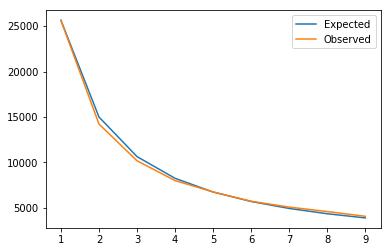



					 EXEMPT_SALES
Expected frequencies:  [25644, 15001, 10643, 8255, 6745, 5703, 4940, 4358, 3898]
Observed frequencies:  [1034, 660, 456, 351, 279, 238, 192, 180, 138]
Mean absolute deviation: 0.106509


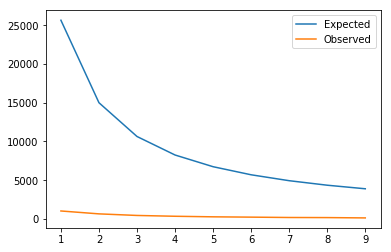



					 SGST_LIABILITY
Expected frequencies:  [25644, 15001, 10643, 8255, 6745, 5703, 4940, 4358, 3898]
Observed frequencies:  [24925, 14134, 10231, 8046, 6496, 5700, 5072, 4446, 3963]
Mean absolute deviation: 0.003579


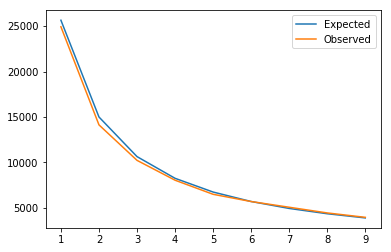



					 CGST_LIABILITY
Expected frequencies:  [25644, 15001, 10643, 8255, 6745, 5703, 4940, 4358, 3898]
Observed frequencies:  [24927, 14130, 10234, 8046, 6495, 5699, 5071, 4449, 3963]
Mean absolute deviation: 0.003583


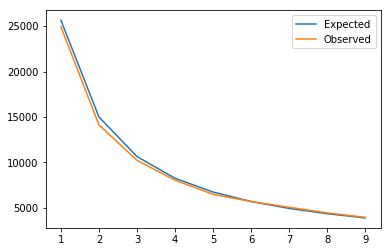



					 IGST_LIABILITY
Expected frequencies:  [25644, 15001, 10643, 8255, 6745, 5703, 4940, 4358, 3898]
Observed frequencies:  [10373, 5869, 4188, 3171, 2626, 2216, 2019, 1726, 1572]
Mean absolute deviation: 0.067077


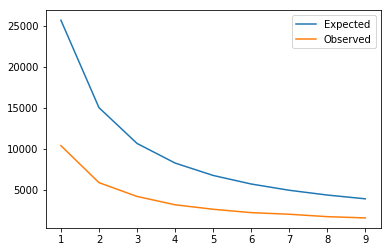



					 TOTAL_LIABILITY
Expected frequencies:  [25644, 15001, 10643, 8255, 6745, 5703, 4940, 4358, 3898]
Observed frequencies:  [26329, 15123, 10513, 7930, 6626, 5570, 4857, 4234, 4005]
Mean absolute deviation: 0.002384


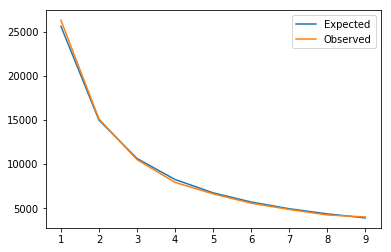



					 SGST_CASHSETOFF
Expected frequencies:  [25644, 15001, 10643, 8255, 6745, 5703, 4940, 4358, 3898]
Observed frequencies:  [11781, 7754, 4714, 3372, 3429, 2307, 2721, 1838, 1703]
Mean absolute deviation: 0.059435


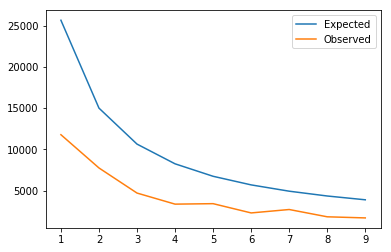



					 CGST_CASHSETOFF
Expected frequencies:  [25644, 15001, 10643, 8255, 6745, 5703, 4940, 4358, 3898]
Observed frequencies:  [11066, 7499, 4461, 3080, 3283, 2241, 2595, 1712, 1609]
Mean absolute deviation: 0.062139


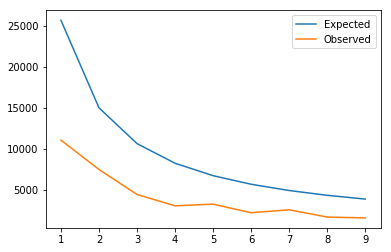



					 IGST_CASHSETOFF
Expected frequencies:  [25644, 15001, 10643, 8255, 6745, 5703, 4940, 4358, 3898]
Observed frequencies:  [3297, 1937, 1369, 1003, 828, 703, 651, 565, 522]
Mean absolute deviation: 0.096927


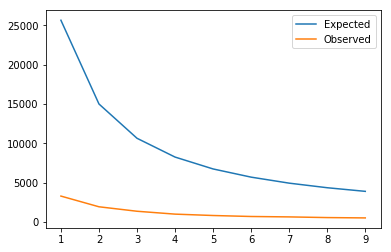



					 TOTAL_CASHSETOFF
Expected frequencies:  [25644, 15001, 10643, 8255, 6745, 5703, 4940, 4358, 3898]
Observed frequencies:  [13436, 8059, 5269, 4332, 4135, 3017, 2302, 2196, 1729]
Mean absolute deviation: 0.053101


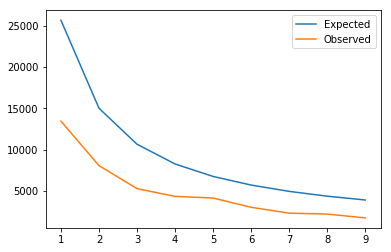



					 SGST_ITC_CLAIMED
Expected frequencies:  [25644, 15001, 10643, 8255, 6745, 5703, 4940, 4358, 3898]
Observed frequencies:  [24054, 13717, 9956, 7808, 6486, 5511, 4858, 4033, 3892]
Mean absolute deviation: 0.006355


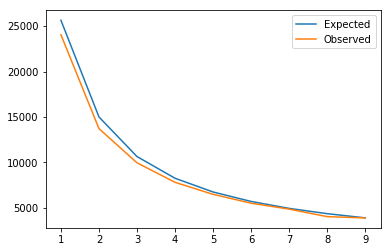



					 CGST_ITC_CLAIMED
Expected frequencies:  [25644, 15001, 10643, 8255, 6745, 5703, 4940, 4358, 3898]
Observed frequencies:  [24058, 13723, 9953, 7808, 6482, 5512, 4858, 4031, 3895]
Mean absolute deviation: 0.006348


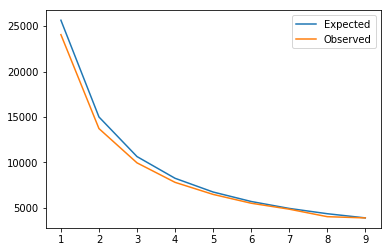



					 IGST_ITC_CLAIMED
Expected frequencies:  [25644, 15001, 10643, 8255, 6745, 5703, 4940, 4358, 3898]
Observed frequencies:  [11969, 7050, 5027, 3796, 3134, 2770, 2337, 1960, 1864]
Mean absolute deviation: 0.059060


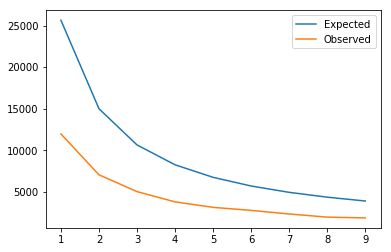



					 TOTAL_ITC_CLAIMED
Expected frequencies:  [25644, 15001, 10643, 8255, 6745, 5703, 4940, 4358, 3898]
Observed frequencies:  [26276, 15357, 10392, 7956, 6506, 5675, 4871, 4211, 3943]
Mean absolute deviation: 0.002695


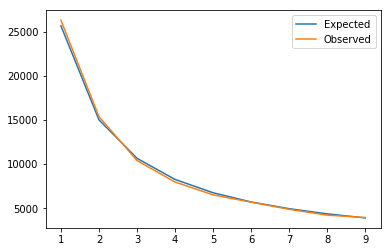

In [10]:
for attr in attrs:
    print('\t\t\t\t\t', attr.upper())
    benford_analysis(dataset[attr])
    print('\n')

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [89]:
correlation_parameter_pairs = [
    ('total_sales', 'total_liability'),
    ('total_liability', 'sgst_liability'),
    ('sgst_liability', 'sgst_cashsetoff'),
    ('total_sales', 'sgst_cashsetoff'),
    ('total_liability', 'total_itc_claimed'),
    ('total_itc_claimed', 'igst_itc_claimed')
]

ratio_parameter_pairs = [
    ('igst_itc_claimed', 'total_itc_claimed'),
    ('igst_itc_claimed', 'total_liability')
]

In [51]:
linear_reg_models = []
for variable_1, variable_2 in correlation_parameter_pairs:
    X = np.array(dataset[variable_1]).reshape(-1, 1)
    Y = np.array(dataset[variable_2])
    linear_reg_models.append(
        LinearRegression().fit(X, Y)
    )

In [52]:
def dist(linear_reg_model, x, y, dist_type='error_dist'):
    """Function to get distance from linear regression separating line"""
    if dist_type == 'error_dist':
        # abs(Prediction - True value)
        return abs((linear_reg_model.coef_[0]*x + linear_reg_model.intercept_) - y)
    
    if dist_type == 'min_dist':
        # minimum distance from the regression line
        return (
            abs(linear_reg_model.coef_[0]*x - y + linear_reg_model.intercept_)
            / (linear_reg_model.coef_[0]**2 + 1)**0.5
        )
    
    raise NotImplementedError('Invalid dist_type')

In [90]:
cols = [
    'id',
    'mnth',
    'correlation_1',
    'correlation_2',
    'correlation_3',
    'correlation_4',
    'correlation_5',
    'correlation_6',
    'ratio_1',
    'ratio_2'
]

In [83]:
modified_dataset = []
for data in dataset.values:
    # Put id and month without modification
    modified_data = [data[0], data[1]]
    
    # Generating correlation params
    for i, (var1, var2) in enumerate(correlation_parameter_pairs):
        x = data[list(dataset.columns).index(var1)]
        y = data[list(dataset.columns).index(var2)]
        modified_data.append(
            dist(linear_reg_models[i], x, y, dist_type='error_dist')
        )
    
    # Generating ratio params
    for var1, var2 in ratio_parameter_pairs:
        x = data[list(dataset.columns).index(var1)]
        y = data[list(dataset.columns).index(var2)]
        modified_data.append(x/y)

    modified_dataset.append(modified_data)

In [84]:
modified_dataset = pd.DataFrame(
    data=modified_dataset,
    columns=cols
)

In [86]:
modified_dataset.describe()

,id,mnth,correlation_1,correlation_2,correlation_3,correlation_4,correlation_5,correlation_6,ratio_1,ratio_2
count,85187.000000,85187.000000,8.518700e+04,8.518700e+04,8.518700e+04,8.518700e+04,8.518700e+04,8.518700e+04,85187.000000,85187.000000
mean,5522.426556,67422.894855,1.584592e+06,2.038935e+05,8.645787e+04,9.623914e+04,3.253539e+05,3.185426e+05,0.239011,6.353301
std,3196.682872,34992.354750,6.601594e+06,1.228416e+06,7.464643e+05,8.506171e+05,2.712657e+06,2.023462e+06,0.353800,667.191343
min,1.000000,12018.000000,7.018285e+01,2.964215e+00,1.244358e+00,3.553966e+01,3.591067e+00,2.932063e+00,0.000000,0.000000
25%,2812.000000,32018.000000,8.114705e+05,4.673758e+04,7.477193e+03,5.398740e+04,1.851077e+04,4.552102e+04,0.000000,0.000000
50%,5450.000000,72017.000000,9.775764e+05,6.582919e+04,1.200603e+04,5.551741e+04,3.664144e+04,7.159166e+04,0.000000,0.000000
75%,8282.000000,102017.000000,1.048101e+06,7.480130e+04,2.395266e+04,5.551746e+04,1.080481e+05,1.196556e+05,0.433051,0.355801
max,11201.000000,122017.000000,4.143785e+08,7.067940e+07,6.033652e+07,7.276485e+07,2.894141e+08,1.579662e+08,1.000000,148556.916667


In [94]:
for col in cols[2:]:
    modified_dataset[col] -= modified_dataset[col].mean()
    modified_dataset[col] /= modified_dataset[col].std()

In [95]:
modified_dataset.describe()

,id,mnth,correlation_1,correlation_2,correlation_3,correlation_4,correlation_5,correlation_6,ratio_1,ratio_2
count,85187.000000,85187.000000,8.518700e+04,8.518700e+04,8.518700e+04,8.518700e+04,8.518700e+04,8.518700e+04,8.518700e+04,8.518700e+04
mean,5522.426556,67422.894855,2.042260e-16,-2.485482e-16,8.902431e-15,4.082237e-15,1.129172e-15,-1.845354e-15,6.284926e-14,-1.855139e-15
std,3196.682872,34992.354750,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,12018.000000,-2.400212e-01,-1.659784e-01,-1.158215e-01,-1.130986e-01,-1.199379e-01,-1.574231e-01,-6.755559e-01,-9.522458e-03
25%,2812.000000,32018.000000,-1.171114e-01,-1.279338e-01,-1.058064e-01,-4.967187e-02,-1.131154e-01,-1.349280e-01,-6.755559e-01,-9.522458e-03
50%,5450.000000,72017.000000,-9.194992e-02,-1.123922e-01,-9.973932e-02,-4.787317e-02,-1.064316e-01,-1.220438e-01,-6.755559e-01,-9.522458e-03
75%,8282.000000,102017.000000,-8.126692e-02,-1.050884e-01,-8.373503e-02,-4.787311e-02,-8.010809e-02,-9.829046e-02,5.484450e-01,-8.989175e-03
max,11201.000000,122017.000000,6.252943e+01,5.737105e+01,8.071392e+01,8.543046e+01,1.065703e+02,7.790989e+01,2.150902e+00,2.226506e+02
